In [ ]:
# Install Kaggle API
!pip install kaggle --quiet

# Upload your kaggle.json from Kaggle account
from google.colab import files
files.upload()  # Upload kaggle.json here

# Move kaggle.json to config folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Airline Flight Delay dataset
!kaggle datasets download -d shubhendra18/flight-delay-data

# Unzip the dataset
!unzip -q flight-delay-data.zip


Saving archive.zip to archive.zip
403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/shubhendra18/flight-delay-data
unzip:  cannot find or open flight-delay-data.zip, flight-delay-data.zip.zip or flight-delay-data.zip.ZIP.


In [ ]:
# Unzip the uploaded file
!unzip -q archive.zip

# Check extracted files
!ls

# Load the CSV (replace with actual file name after unzip)
import pandas as pd

df = pd.read_csv("flights.csv")  # change name if different
df.head()


airlines.csv  airports.csv  archive.zip  flights.csv  kaggle.json  sample_data


/tmp/ipython-input-453623888.py:10: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("flights.csv")  # change name if different


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#  Step 1: Load Data
import pandas as pd

# Load datasets
flights = pd.read_csv("flights.csv", low_memory=False)
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")

print("Flights shape:", flights.shape)
print("Airlines shape:", airlines.shape)
print("Airports shape:", airports.shape)

# Preview
print("\nFlights sample:")
print(flights.head(3))
print("\nAirlines sample:")
print(airlines.head(3))
print("\nAirports sample:")
print(airports.head(3))


#  Step 2: Merge airline names
flights = flights.merge(airlines, how="left", left_on="AIRLINE", right_on="IATA_CODE")

# Step 3: Merge origin airport details
flights = flights.merge(airports, how="left", left_on="ORIGIN_AIRPORT", right_on="IATA_CODE", suffixes=('', '_ORIGIN'))

#  Step 4: Merge destination airport details
flights = flights.merge(airports, how="left", left_on="DESTINATION_AIRPORT", right_on="IATA_CODE", suffixes=('', '_DEST'))

# Drop duplicate IATA_CODE columns after merge
flights.drop(columns=["IATA_CODE", "IATA_CODE_ORIGIN", "IATA_CODE_DEST"], errors='ignore', inplace=True)

print("\n Merging complete! New shape:", flights.shape)
print("\nSample after merge:")
print(flights.head(3))


Flights shape: (5819079, 31)
Airlines shape: (14, 2)
Airports shape: (322, 7)

Flights sample:
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                  NaN               NaN   
1           -9.0         0          0                  NaN               NaN   
2            5.0         0          0                  NaN 

In [ ]:
# Step 3: Clean column names
flights.columns = flights.columns.str.lower().str.replace(" ", "_")

# Step 4: Check missing values
missing_summary = flights.isnull().sum().sort_values(ascending=False)
print("\nMissing Values Summary:\n", missing_summary.head(15))

# Step 5: Create a proper datetime column
flights['date'] = pd.to_datetime(flights[['year', 'month', 'day']])

# Step 6: Basic filtering (optional — speeds up EDA)
# You can comment this out if you want the full dataset
flights_sample = flights.sample(500000, random_state=42)  # take 500k for faster exploration

print("\n Data cleaned. Sample shape:", flights_sample.shape)
print(flights_sample.head(3))



Missing Values Summary:
 cancellation_reason    5729195
airline_delay          4755640
air_system_delay       4755640
security_delay         4755640
weather_delay          4755640
late_aircraft_delay    4755640
longitude_dest          490775
latitude_dest           490775
longitude               490770
latitude                490770
country_dest            486165
airport                 486165
state_dest              486165
airport_dest            486165
country                 486165
dtype: int64

 Data cleaned. Sample shape: (500000, 45)
         year  month  day  day_of_week airline_x  flight_number tail_number  \
1508570  2015      4    7            2        EV           4900      N759EV   
363270   2015      1   24            6        AS            611      N413AS   
3003945  2015      7    8            3        WN           1483      N463WN   

        origin_airport destination_airport  scheduled_departure  ...  country  \
1508570            FWA                 DTW             

/tmp/ipython-input-837792941.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_delays', y='airline_x', data=airline_delay_stats, palette='viridis')


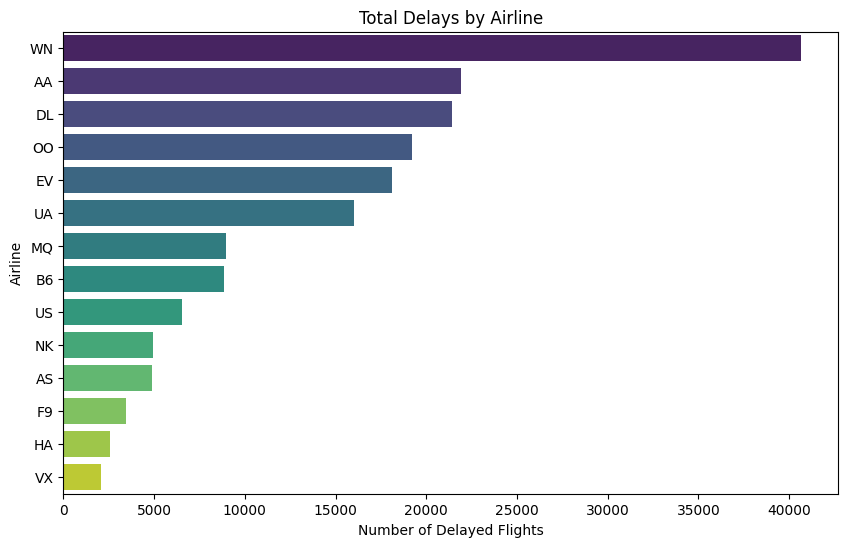


 Airline Delay Stats:
    airline_x  total_delays  avg_delay
13        WN         40683  29.615958
0         AA         21907  34.809056
3         DL         21425  32.364807
9         OO         19203  32.570744
4         EV         18125  35.118952
10        UA         16044  38.355211
7         MQ          8958  40.035276
2         B6          8856  39.063121
11        US          6532  27.428659
8         NK          4934  39.022294
1         AS          4869  22.278291
5         F9          3441  41.481255
6         HA          2576  15.227096
12        VX          2079  32.248196


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Delay only for flights with positive arrival delay
airline_delay_stats = (
    flights_sample[flights_sample['arrival_delay'] > 0]
    .groupby('airline_x')
    .agg(total_delays=('arrival_delay', 'count'),
         avg_delay=('arrival_delay', 'mean'))
    .reset_index()
    .sort_values('total_delays', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(x='total_delays', y='airline_x', data=airline_delay_stats, palette='viridis')
plt.title("Total Delays by Airline")
plt.xlabel("Number of Delayed Flights")
plt.ylabel("Airline")
plt.show()

print("\n Airline Delay Stats:\n", airline_delay_stats)


/tmp/ipython-input-1065987677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_delays', y='origin_airport', data=airport_delay_stats, palette='magma')


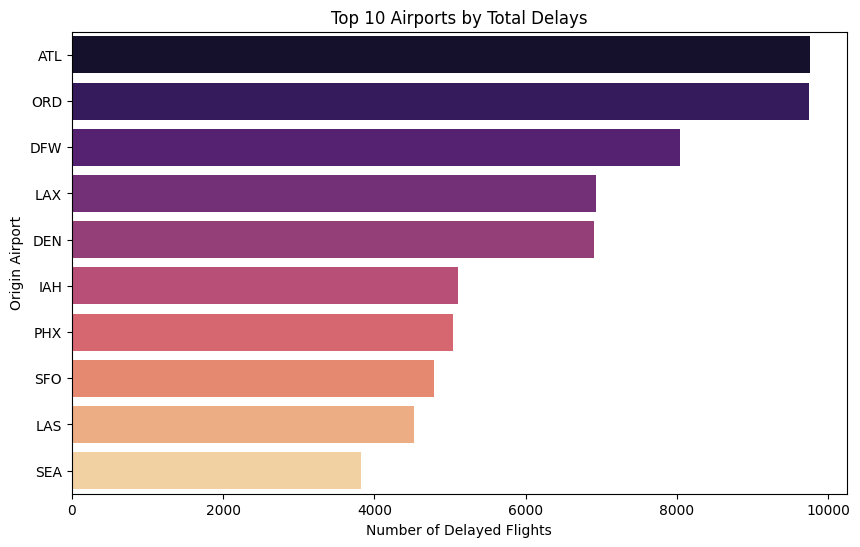


 Top Delayed Airports:
     origin_airport  total_delays  avg_delay
301            ATL          9756  30.591328
509            ORD          9745  39.498923
367            DFW          8040  34.733582
457            LAX          6932  30.568379
366            DEN          6897  32.373496
432            IAH          5109  32.198473
520            PHX          5039  26.544156
559            SFO          4788  34.342941
455            LAS          4526  31.801149
558            SEA          3818  25.899162


In [ ]:
airport_delay_stats = (
    flights_sample[flights_sample['arrival_delay'] > 0]
    .groupby('origin_airport')
    .agg(total_delays=('arrival_delay', 'count'),
         avg_delay=('arrival_delay', 'mean'))
    .reset_index()
    .sort_values('total_delays', ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x='total_delays', y='origin_airport', data=airport_delay_stats, palette='magma')
plt.title("Top 10 Airports by Total Delays")
plt.xlabel("Number of Delayed Flights")
plt.ylabel("Origin Airport")
plt.show()

print("\n Top Delayed Airports:\n", airport_delay_stats)


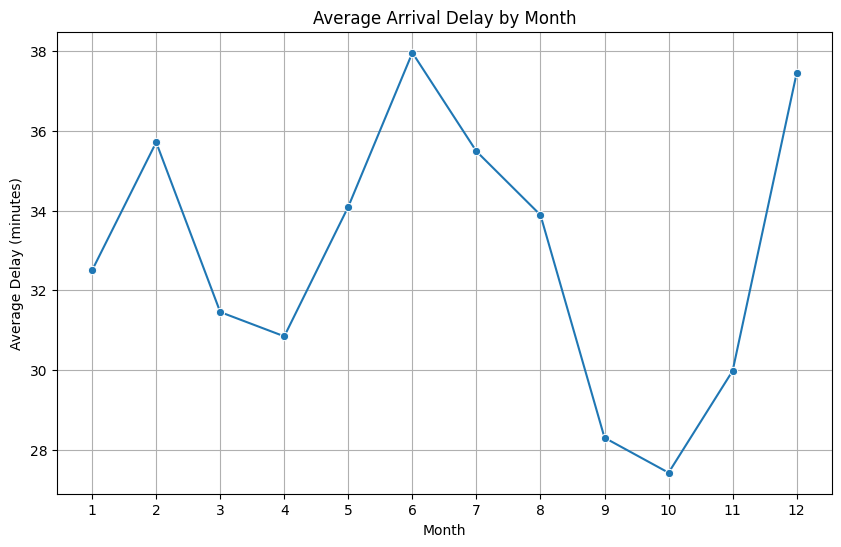


 Monthly Delay:
     month  arrival_delay
0       1      32.501935
1       2      35.713809
2       3      31.454091
3       4      30.844700
4       5      34.099096
5       6      37.961064
6       7      35.486764
7       8      33.889062
8       9      28.300044
9      10      27.422399
10     11      29.977895
11     12      37.451869


In [ ]:
monthly_delay = (
    flights_sample[flights_sample['arrival_delay'] > 0]
    .groupby('month')['arrival_delay']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='arrival_delay', data=monthly_delay, marker='o')
plt.title("Average Arrival Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

print("\n Monthly Delay:\n", monthly_delay)


In [ ]:
# See actual column names
print(df.columns.tolist())


['year', 'month', 'day', 'day_of_week', 'airline', 'flight_number', 'tail_number', 'origin_airport', 'destination_airport', 'scheduled_departure', 'departure_time', 'departure_delay', 'taxi_out', 'wheels_off', 'scheduled_time', 'elapsed_time', 'air_time', 'distance', 'wheels_on', 'taxi_in', 'scheduled_arrival', 'arrival_time', 'arrival_delay', 'diverted', 'cancelled', 'cancellation_reason', 'air_system_delay', 'security_delay', 'airline_delay', 'late_aircraft_delay', 'weather_delay']


In [ ]:
# Fill missing delay columns with 0
delay_cols = ['airline_delay', 'air_system_delay', 'security_delay',
              'weather_delay', 'late_aircraft_delay']
df[delay_cols] = df[delay_cols].fillna(0)

# Fill categorical columns with 'Unknown'
cat_cols = ['cancellation_reason']
df[cat_cols] = df[cat_cols].fillna('Unknown')


/tmp/ipython-input-1871725169.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




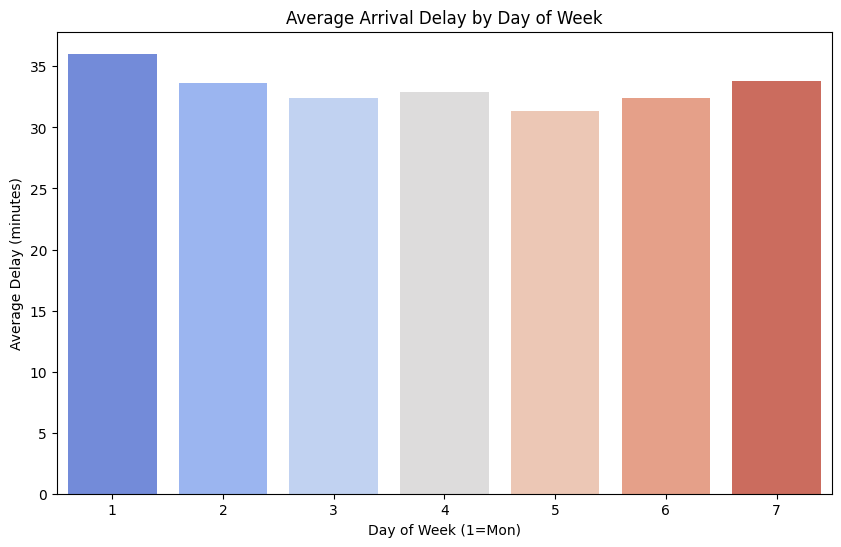


📊 Day of Week Delay:
    day_of_week  arrival_delay
0            1      36.034487
1            2      33.673149
2            3      32.405029
3            4      32.905237
4            5      31.337744
5            6      32.446171
6            7      33.815611


In [ ]:
dow_delay = (
    flights_sample[flights_sample['arrival_delay'] > 0]
    .groupby('day_of_week')['arrival_delay']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(x='day_of_week', y='arrival_delay', data=dow_delay, palette='coolwarm')
plt.title("Average Arrival Delay by Day of Week")
plt.xlabel("Day of Week (1=Mon)")
plt.ylabel("Average Delay (minutes)")
plt.show()

print("\n📊 Day of Week Delay:\n", dow_delay)


In [ ]:
import plotly.express as px

# 1 Delays by Airline
fig1 = px.bar(
    airline_delay_stats,
    x='total_delays',
    y='airline_x',
    color='avg_delay',
    color_continuous_scale='Viridis',
    title='Total Delays by Airline (Interactive)',
    labels={'total_delays':'Number of Delays', 'airline_x':'Airline', 'avg_delay':'Avg Delay (min)'},
    hover_data={'avg_delay': ':.2f'}
)
fig1.show()

# 2 Average Delay by Month
fig2 = px.line(
    monthly_delay,
    x='month',
    y='arrival_delay',
    title='Average Arrival Delay by Month',
    markers=True,
    labels={'arrival_delay':'Average Delay (min)', 'month':'Month'}
)
fig2.show()

# 3 Top 10 Delayed Airports
fig3 = px.bar(
    airport_delay_stats,
    x='total_delays',
    y='origin_airport',
    color='avg_delay',
    color_continuous_scale='Magma',
    title='Top 10 Delayed Airports',
    labels={'total_delays':'Number of Delays', 'origin_airport':'Airport', 'avg_delay':'Avg Delay (min)'},
    hover_data={'avg_delay': ':.2f'}
)
fig3.show()


In [ ]:
import plotly.io as pio

# Save each chart separately
pio.write_html(fig1, file="delays_by_airline.html", auto_open=False)
pio.write_html(fig2, file="avg_delay_by_month.html", auto_open=False)
pio.write_html(fig3, file="top_delayed_airports.html", auto_open=False)

# OPTIONAL: Save all charts in one file
with open("flight_delay_dashboard.html", "a") as f:
    f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig2.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig3.to_html(full_html=False, include_plotlyjs='cdn'))

print(" Dashboard saved as flight_delay_dashboard.html")


 Dashboard saved as flight_delay_dashboard.html


In [ ]:
# Create requirements.txt with main dependencies
with open("requirements.txt", "w") as f:
    f.write("pandas\nplotly\nkaleido\n")

print("requirements.txt created!")


requirements.txt created!


In [29]:
# Create a README.md with project description
with open("README.md", "w") as f:
    f.write("# Airline Flight Delay Analysis\n")
    f.write("This project analyzes US flight delay patterns using 2015 data.\n")
    f.write("It covers delay causes, airline performance, and airport congestion.\n")
    f.write("\n## Features\n")
    f.write("- Data cleaning and preprocessing\n")
    f.write("- Exploratory Data Analysis (EDA)\n")
    f.write("- Interactive dashboards with Plotly\n")
    f.write("\n## Dataset Source\n")
    f.write("US DOT 2015 Flight Delays and Cancellations dataset on Kaggle.\n")

print("README.md created!")


README.md created!


In [30]:
# See actual column names
print(df.columns.tolist())


['year', 'month', 'day', 'day_of_week', 'airline', 'flight_number', 'tail_number', 'origin_airport', 'destination_airport', 'scheduled_departure', 'departure_time', 'departure_delay', 'taxi_out', 'wheels_off', 'scheduled_time', 'elapsed_time', 'air_time', 'distance', 'wheels_on', 'taxi_in', 'scheduled_arrival', 'arrival_time', 'arrival_delay', 'diverted', 'cancelled', 'cancellation_reason', 'air_system_delay', 'security_delay', 'airline_delay', 'late_aircraft_delay', 'weather_delay']
